In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266543 entries, 0 to 266542
Data columns (total 9 columns):
lat          266543 non-null float64
lng          266543 non-null float64
desc         266543 non-null object
zip          234049 non-null float64
title        266543 non-null object
timeStamp    266543 non-null object
twp          266448 non-null object
addr         266543 non-null object
e            266543 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 18.3+ MB


In [6]:
df.describe()

,lat,lng,zip,e
count,266543.000000,266543.000000,234049.000000,266543.0
mean,40.159200,-75.316831,19235.194429,1.0
std,0.089112,0.161089,306.362554,0.0
min,30.333596,-95.595595,17555.000000,1.0
25%,40.100055,-75.393304,19038.000000,1.0
50%,40.144296,-75.304635,19401.000000,1.0
75%,40.229008,-75.211812,19446.000000,1.0
max,41.167156,-74.813670,77316.000000,1.0


In [7]:
#Top 5 zipcodes 
df['zip'].value_counts().head(5)

19401.0    18401
19464.0    17937
19403.0    13366
19446.0    12828
19406.0     8820
Name: zip, dtype: int64

In [8]:
# Number of unique titles for emergencies
df['title'].nunique()

130

In [9]:
#Creating a new Reason column based on title to separate the Reason/Department part from title
df['Reason']=df['title'].apply(lambda x: x.split(':')[0])
#Number of rows for each Reason
df['Reason'].value_counts()

EMS        133234
Traffic     93400
Fire        39909
Name: Reason, dtype: int64

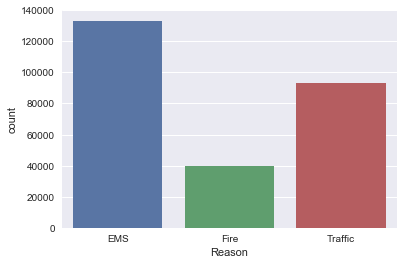

In [10]:
#Using a countplot to show the number of Reasons
sns.countplot(x='Reason', data=df)

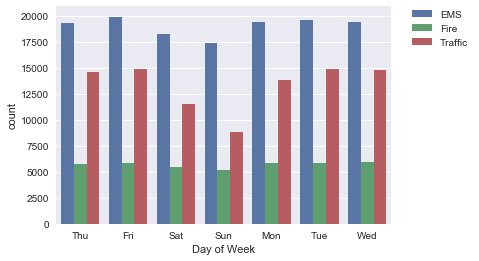

In [11]:
#Converting the timestamp column into datetime format from str format 
df['timeStamp']=pd.to_datetime(df['timeStamp'])

#creating new columns-Hour, Month and Day of Week to separate the hour, month and day value from timestamp
df['Hour']=df['timeStamp'].apply(lambda time: time.hour)
df['Month']=df['timeStamp'].apply(lambda time: time.month)
df['Day of Week']=df['timeStamp'].apply(lambda time: time.dayofweek)

#The Day of Week column appears as an integer ranging from 0-6, using dmap we map string values to the 
#integers such as follows
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week']=df['Day of Week'].map(dmap)

#Create a countplot to see number of 911 calls on each day of the week for each of the Reasons
sns.countplot(x='Day of Week', data=df, hue='Reason')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

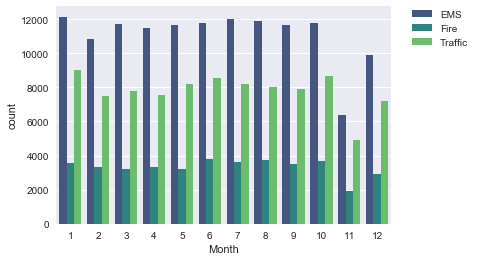

In [12]:
# Let us see a similar kind of plot for monthly distribution of 911 calls
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

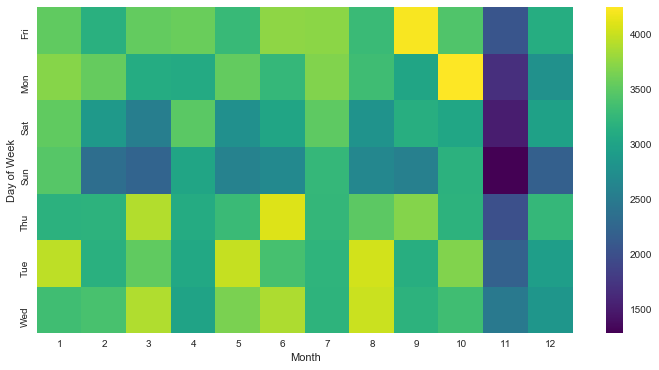

In [13]:
#Heatmap plot for day of week and month
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')